# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Directory
output_data_loc = "../output_data"

# Output File (CSV)
output_data_file = f"{output_data_loc}/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [150]:
cities = []

def buildCityList() :
    # List for holding lat_lngs and cities
    lat_lngs = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

buildCityList()

if len(cities) < 500:
    buildCityList()

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [151]:
# The free version of the openweathermap api allows for max 60 requests per minute, so we need to chunk our cities list
# into sets of < 60 per set to safely make calls 1 set per minute to ensure the requets get fullfiled and our account
# doesn't get suspended

def splitListBySize(listToSplit, size):
     lst = []
     while len(listToSplit) > size:
         chunk = listToSplit[:size]
         lst.append(chunk)
         listToSplit = listToSplit[size:]
     lst.append(listToSplit)
     return lst

city_sets = splitListBySize(cities,50)
city_sets

[['samarai',
  'puerto ayora',
  'belushya guba',
  'ternate',
  'mahebourg',
  'manta',
  'los llanos de aridane',
  'vostok',
  'mataura',
  'nikolskoye',
  'qaanaaq',
  'bolekhiv',
  'severo-kurilsk',
  'nanpiao',
  'pisco',
  'attawapiskat',
  'albany',
  'hithadhoo',
  'byron bay',
  'isangel',
  'pucara',
  'rikitea',
  'georgetown',
  'sao gabriel da cachoeira',
  'ushuaia',
  'flinders',
  'grand river south east',
  'luderitz',
  'pemangkat',
  'griffith',
  'saskylakh',
  'norwalk',
  'barrow',
  'taolanaro',
  'new norfolk',
  'hilo',
  'codrington',
  'coquimbo',
  'mahajanga',
  'mar del plata',
  'kruisfontein',
  'tasiilaq',
  'poya',
  'vao',
  'lorengau',
  'butaritari',
  'punta arenas',
  'nalut',
  'banda aceh',
  'atuona'],
 ['meulaboh',
  'bur gabo',
  'kayes',
  'la palma',
  'wilmington',
  'constitucion',
  'kodiak',
  'ciudad guayana',
  'namibe',
  'asyut',
  'payo',
  'thompson',
  'krasnovishersk',
  'clyde river',
  'nador',
  'bredasdorp',
  'indramayu',


In [152]:


# base url for request
base_url = "http://api.openweathermap.org/data/2.5/weather"

# params for request
params = {
"units":"imperial",
"appid":weather_api_key
}

params['q'] = cities[0]
response = requests.get(url=base_url, params=params).json()
response


{'coord': {'lon': 150.6667, 'lat': -10.6167},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 79.63,
  'feels_like': 79.63,
  'temp_min': 79.63,
  'temp_max': 79.63,
  'pressure': 1011,
  'humidity': 85,
  'sea_level': 1011,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 12.82, 'deg': 126, 'gust': 16.15},
 'clouds': {'all': 50},
 'dt': 1632704422,
 'sys': {'country': 'PG', 'sunrise': 1632685432, 'sunset': 1632729177},
 'timezone': 36000,
 'id': 2132606,
 'name': 'Samarai',
 'cod': 200}

In [153]:
weather_data_cities = []

print('Beginning Data Retrieval\n------------------------------')

#for x in range(len(cities)):
#    print(f'Processing Record {x} of Set {} | {cities[x]}')

#def keepGoing(howmany, timeframe, startedAt):
#    tic = time.perf_counter()

# get the current time

city_sets_upperBound = (len(city_sets)-1)

for set_idx, city_set in enumerate(city_sets):    
    
    tic = time.perf_counter()
    
    for record_idx, city in enumerate(city_set):
        print(f'Processing Record {record_idx} of Set {set_idx} | {city}')
        
        # Add the city to the query params for the request
        params['q'] = city
        
        # Make the request
        response = requests.get(url=base_url, params=params).json()
        
        try:
            name = response['name']
        
            # add the response to a list 
            weather_data_cities.append(response)
        except:
            print('City not found. Skipping...')
            pass        
       
    toc = time.perf_counter()
    
    # if toc is > 1 min since tic, go ahead and iterate, otherwise wait whatever duration is left between 1 min and the elapsed time
    
    elapsedTime = toc - tic
    
    if set_idx < city_sets_upperBound:    
        if elapsedTime <= 60 :
            timeToWait = (60 - elapsedTime)
            print(f'waiting {timeToWait} seconds before next batch...')
            time.sleep(timeToWait)
            print('Resuming...')
    else:
        print('All cities processed!')

Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 0 | samarai
Processing Record 1 of Set 0 | puerto ayora
Processing Record 2 of Set 0 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 0 | ternate
Processing Record 4 of Set 0 | mahebourg
Processing Record 5 of Set 0 | manta
Processing Record 6 of Set 0 | los llanos de aridane
Processing Record 7 of Set 0 | vostok
Processing Record 8 of Set 0 | mataura
Processing Record 9 of Set 0 | nikolskoye
Processing Record 10 of Set 0 | qaanaaq
Processing Record 11 of Set 0 | bolekhiv
Processing Record 12 of Set 0 | severo-kurilsk
Processing Record 13 of Set 0 | nanpiao
Processing Record 14 of Set 0 | pisco
Processing Record 15 of Set 0 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 0 | albany
Processing Record 17 of Set 0 | hithadhoo
Processing Record 18 of Set 0 | byron bay
Processing Record 19 of Set 0 | isangel
Processing Record 20 of Set 0 | pucara
Processing Record 

Processing Record 33 of Set 3 | fort saint john
City not found. Skipping...
Processing Record 34 of Set 3 | ryki
Processing Record 35 of Set 3 | nanortalik
Processing Record 36 of Set 3 | aksu
Processing Record 37 of Set 3 | dunedin
Processing Record 38 of Set 3 | bud
Processing Record 39 of Set 3 | husavik
Processing Record 40 of Set 3 | rawannawi
City not found. Skipping...
Processing Record 41 of Set 3 | marystown
Processing Record 42 of Set 3 | olafsvik
Processing Record 43 of Set 3 | mana
Processing Record 44 of Set 3 | vardo
Processing Record 45 of Set 3 | sitka
Processing Record 46 of Set 3 | luganville
Processing Record 47 of Set 3 | estelle
Processing Record 48 of Set 3 | kaitangata
Processing Record 49 of Set 3 | panuco
waiting 49.24533549998887 seconds before next batch...
Resuming...
Processing Record 0 of Set 4 | karasjok
Processing Record 1 of Set 4 | straumen
Processing Record 2 of Set 4 | ancud
Processing Record 3 of Set 4 | russell
Processing Record 4 of Set 4 | nelson

Processing Record 16 of Set 7 | cubara
Processing Record 17 of Set 7 | oxford
Processing Record 18 of Set 7 | paso de los toros
Processing Record 19 of Set 7 | changde
Processing Record 20 of Set 7 | prudentopolis
Processing Record 21 of Set 7 | lebu
Processing Record 22 of Set 7 | solone
Processing Record 23 of Set 7 | umm lajj
Processing Record 24 of Set 7 | mayo
Processing Record 25 of Set 7 | ulaangom
Processing Record 26 of Set 7 | riachao das neves
Processing Record 27 of Set 7 | matadi
Processing Record 28 of Set 7 | san miguel
Processing Record 29 of Set 7 | mamou
Processing Record 30 of Set 7 | port elizabeth
Processing Record 31 of Set 7 | pacifica
Processing Record 32 of Set 7 | kavaratti
Processing Record 33 of Set 7 | portland
Processing Record 34 of Set 7 | kijang
Processing Record 35 of Set 7 | qesarya
Processing Record 36 of Set 7 | phan rang
City not found. Skipping...
Processing Record 37 of Set 7 | pangnirtung
Processing Record 38 of Set 7 | kuche
City not found. Ski

Processing Record 48 of Set 10 | omagari
Processing Record 49 of Set 10 | san jose
waiting 47.258576300009736 seconds before next batch...
Resuming...
Processing Record 0 of Set 11 | ust-bolsheretsk
City not found. Skipping...
Processing Record 1 of Set 11 | huarmey
Processing Record 2 of Set 11 | whitehorse
Processing Record 3 of Set 11 | marawi
Processing Record 4 of Set 11 | rungata
City not found. Skipping...
Processing Record 5 of Set 11 | djibo
Processing Record 6 of Set 11 | herat
Processing Record 7 of Set 11 | hato mayor
Processing Record 8 of Set 11 | gorno-chuyskiy
City not found. Skipping...
Processing Record 9 of Set 11 | manokwari
Processing Record 10 of Set 11 | sioux lookout
Processing Record 11 of Set 11 | sladkovo
Processing Record 12 of Set 11 | diapaga
Processing Record 13 of Set 11 | ondangwa
Processing Record 14 of Set 11 | rawson
Processing Record 15 of Set 11 | bacolod
Processing Record 16 of Set 11 | haines junction
Processing Record 17 of Set 11 | broome
Proce

In [50]:
weather_data_cities

[{'coord': {'lon': 33.2787, 'lat': 45.1582},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 64.94,
   'feels_like': 64.33,
   'temp_min': 64.94,
   'temp_max': 64.94,
   'pressure': 1020,
   'humidity': 68,
   'sea_level': 1020,
   'grnd_level': 1019},
  'visibility': 10000,
  'wind': {'speed': 10.38, 'deg': 284, 'gust': 15.9},
  'clouds': {'all': 59},
  'dt': 1632683939,
  'sys': {'type': 2,
   'id': 2037874,
   'country': 'UA',
   'sunrise': 1632627519,
   'sunset': 1632670665},
  'timezone': 10800,
  'id': 687726,
  'name': 'Zaozyornoye',
  'cod': 200},
 {'coord': {'lon': 168.3333, 'lat': -46.6},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 38.79,
   'feels_like': 33.13,
   'temp_min': 38.79,
   'temp_max': 38.79,
   'pressure': 1021,
   'humidity': 80,
   'sea_level': 1021,
   'grnd_level

In [154]:
# Now build a list of only the data we want to work with from the json
weather_data_list = []

for city in weather_data_cities:
    weather_data_dict = {}
    weather_data_dict['City'] = city['name']
    weather_data_dict['Lat'] = city['coord']['lat']
    weather_data_dict['Lng'] = city['coord']['lon']
    weather_data_dict['Max Temp'] = city['main']['temp_max']
    weather_data_dict['Humidity'] = city['main']['humidity']
    weather_data_dict['Cloudiness'] = city['clouds']['all']
    weather_data_dict['Wind Speed'] = city['wind']['speed']
    weather_data_dict['Country'] = city['sys']['country']
    weather_data_dict['Date'] = city['dt']
    weather_data_list.append(weather_data_dict)
    
weather_data_list, len(weather_data_list)

([{'City': 'Samarai',
   'Lat': -10.6167,
   'Lng': 150.6667,
   'Max Temp': 79.63,
   'Humidity': 85,
   'Cloudiness': 50,
   'Wind Speed': 12.82,
   'Country': 'PG',
   'Date': 1632704422},
  {'City': 'Puerto Ayora',
   'Lat': -0.7393,
   'Lng': -90.3518,
   'Max Temp': 69.28,
   'Humidity': 90,
   'Cloudiness': 99,
   'Wind Speed': 8.37,
   'Country': 'EC',
   'Date': 1632704424},
  {'City': 'Ternate',
   'Lat': 0.8,
   'Lng': 127.4,
   'Max Temp': 83.86,
   'Humidity': 70,
   'Cloudiness': 45,
   'Wind Speed': 3.62,
   'Country': 'ID',
   'Date': 1632704425},
  {'City': 'Mahébourg',
   'Lat': -20.4081,
   'Lng': 57.7,
   'Max Temp': 68.25,
   'Humidity': 81,
   'Cloudiness': 74,
   'Wind Speed': 21.88,
   'Country': 'MU',
   'Date': 1632704425},
  {'City': 'Manta',
   'Lat': -0.95,
   'Lng': -80.7333,
   'Max Temp': 71.78,
   'Humidity': 83,
   'Cloudiness': 100,
   'Wind Speed': 11.43,
   'Country': 'EC',
   'Date': 1632704426},
  {'City': 'Los Llanos de Aridane',
   'Lat': 28.658

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [155]:
# Convert to DataFrame
city_weather_df = pd.DataFrame(weather_data_list)

# Export the city data into a .csv
city_weather_df.to_csv(output_data_file)

# Display the DataFrame 
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.6167,150.6667,79.63,85,50,12.82,PG,1632704422
1,Puerto Ayora,-0.7393,-90.3518,69.28,90,99,8.37,EC,1632704424
2,Ternate,0.8000,127.4000,83.86,70,45,3.62,ID,1632704425
3,Mahébourg,-20.4081,57.7000,68.25,81,74,21.88,MU,1632704425
4,Manta,-0.9500,-80.7333,71.78,83,100,11.43,EC,1632704426


In [156]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.943605,13.463212,64.755400,71.252727,50.249091,7.556873,1.632705e+09
std,32.197777,89.952992,15.746662,20.103914,40.963284,5.805656,2.378040e+02
min,-54.800000,-175.200000,7.290000,9.000000,0.000000,0.000000,1.632704e+09
25%,-6.431625,-65.027775,55.295000,62.000000,5.250000,3.280000,1.632705e+09
50%,26.157550,16.254150,68.065000,76.000000,47.000000,5.760000,1.632705e+09
75%,46.290975,90.154900,77.385000,86.000000,97.000000,10.360000,1.632705e+09
max,78.218600,179.316700,93.810000,100.000000,100.000000,35.460000,1.632705e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [157]:
#city_weather_df

humidity_count = city_weather_df.loc[city_weather_df['Humidity']>100, 'Humidity'].count()

# if the count is > 0, remove those records
if humidity_count > 0:
    print(f"There were {humidity_count} records in this set that had > 100% humidity so removing them from the set...")
    clean_city_data_df = city_weather_df.loc[city_weather_df['Humidity']<=100]    
else:
    print("No cities in this set had > 100% humidity so skipping...")
    clean_city_data_df = city_weather_df

No cities in this set had > 100% humidity so skipping...


In [158]:
clean_city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.6167,150.6667,79.63,85,50,12.82,PG,1632704422
1,Puerto Ayora,-0.7393,-90.3518,69.28,90,99,8.37,EC,1632704424
2,Ternate,0.8000,127.4000,83.86,70,45,3.62,ID,1632704425
3,Mahébourg,-20.4081,57.7000,68.25,81,74,21.88,MU,1632704425
4,Manta,-0.9500,-80.7333,71.78,83,100,11.43,EC,1632704426
...,...,...,...,...,...,...,...,...,...
545,Khani,41.9563,42.9566,40.57,83,10,5.14,GE,1632705096
546,Saraland,30.8207,-88.0706,74.23,76,100,3.53,US,1632705144
547,Iskateley,67.6803,53.1512,39.31,79,100,11.18,RU,1632705144
548,Skibbereen,51.5500,-9.2667,51.60,75,100,8.86,IE,1632705145


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No cities in this set had > 100 humidity so skipping


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

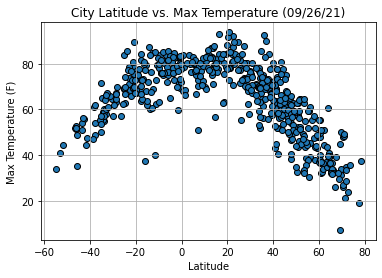

In [159]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Max Temp"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_MaxTemp_InWorldCities.png")

# Show plot
plt.show()

The Latitude vs. Temperature Plot shows that as a city approaches the latitude of the equator, the temperature rises.

## Latitude vs. Humidity Plot

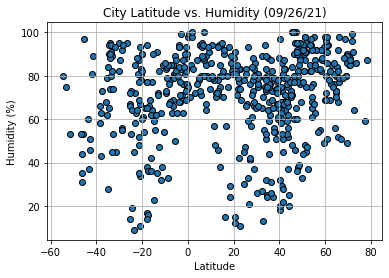

In [160]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Humidity"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_Humidity_InWorldCities.png")

# Show plot
plt.show()

The Latitude vs. Humidity Plot shows that there does not seem to be any overly meaninful correlation between latitude and humidity regarding proximity to the equator. This dataset does seem to show that the majority of the cities have humidity between 60% and 100% and it could be inferred that cites above the equator potentially have more of a chance of having higher humidity than those beneath the equator given the clustering between 60% and 100% above the the equator.

## Latitude vs. Cloudiness Plot

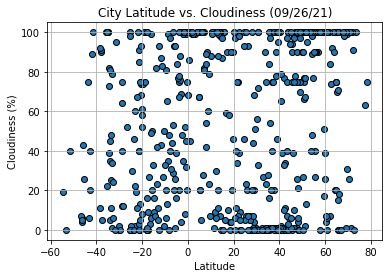

In [161]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Cloudiness"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_Cloudiness_InWorldCities.png")

# Show plot
plt.show()

The Latitude vs. Cloudiness Plot also doesn't have a very meaningful correlation regarding proximity to the equator, however it does seem to depict the majority of cities either have very little cloudiness or alot of cloudiness with the majority clustering between 80 - 100% and 0 to 20%.

## Latitude vs. Wind Speed Plot

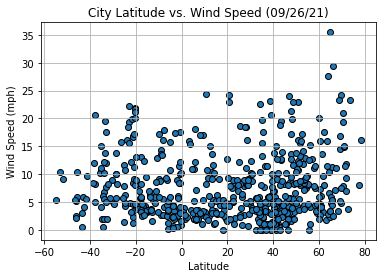

In [162]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Wind Speed"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_WindSpeed_InWorldCities.png")

# Show plot
plt.show()

The Latitude vs. Wind Speed Plot also does not show a meaningfull correlation regarding proximity to the equator.  It does however show that the majority of cities in this set have lower windspeeds with the majority all clustering between 0 and 15 mph.

## Linear Regression

In [188]:
northern_city_weather_df = clean_city_data_df.loc[(city_weather_df["Lat"]>=0)]
northern_city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ternate,0.8000,127.4000,83.86,70,45,3.62,ID,1632704425
5,Los Llanos de Aridane,28.6585,-17.9182,69.55,66,20,8.05,ES,1632704426
6,Vostok,46.4856,135.8833,63.19,60,98,2.24,RU,1632704427
8,Nikolskoye,59.7035,30.7861,48.09,98,39,4.34,RU,1632704428
9,Qaanaaq,77.4840,-69.3632,19.06,59,63,8.12,GL,1632704428
...,...,...,...,...,...,...,...,...,...
545,Khani,41.9563,42.9566,40.57,83,10,5.14,GE,1632705096
546,Saraland,30.8207,-88.0706,74.23,76,100,3.53,US,1632705144
547,Iskateley,67.6803,53.1512,39.31,79,100,11.18,RU,1632705144
548,Skibbereen,51.5500,-9.2667,51.60,75,100,8.86,IE,1632705145


In [189]:
southern_city_weather_df = clean_city_data_df.loc[(city_weather_df["Lat"]<=0)]
southern_city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.6167,150.6667,79.63,85,50,12.82,PG,1632704422
1,Puerto Ayora,-0.7393,-90.3518,69.28,90,99,8.37,EC,1632704424
3,Mahébourg,-20.4081,57.7000,68.25,81,74,21.88,MU,1632704425
4,Manta,-0.9500,-80.7333,71.78,83,100,11.43,EC,1632704426
7,Mataura,-46.1927,168.8643,51.48,35,6,2.44,NZ,1632704318
...,...,...,...,...,...,...,...,...,...
531,Longonjo,-12.9067,15.2533,60.80,71,5,1.66,AO,1632705093
532,Kendari,-3.9450,122.4989,82.96,68,100,2.37,ID,1632705093
540,Grajaú,-5.8194,-46.1386,81.88,50,26,3.51,BR,1632705095
541,Noumea,-22.2763,166.4572,76.98,64,11,12.24,NC,1632705095


In [176]:
northern_city_weather_df = clean_city_data_df.loc[(city_weather_df["Lat"]>=0)]
southern_city_weather_df = clean_city_data_df.loc[(city_weather_df["Lat"]<=0)]

# function to calculate linear regression values and return them along with the line equation after printing the r value
def calcLinregress(x_vals, y_vals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    return regress_values, line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8220145940507662


Text(0.5, 0, 'Latitude')

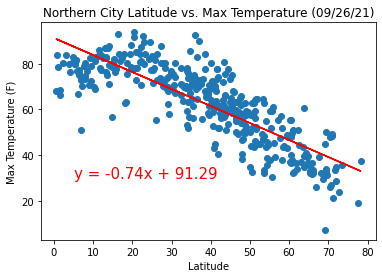

In [179]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_weather_df["Lat"], northern_city_weather_df["Max Temp"])
#regress_values = northern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Max Temp"])

plt.scatter(northern_city_weather_df["Lat"], northern_city_weather_df["Max Temp"])
plt.plot(northern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(5,30),fontsize=15,color="red")
plt.title(f"Northern City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7479765771089546


Text(0.5, 0, 'Latitude')

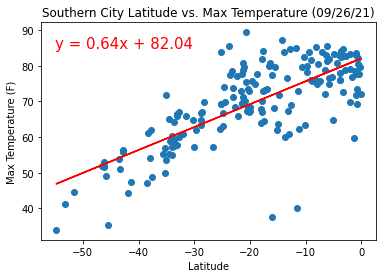

In [180]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_weather_df["Lat"], southern_city_weather_df["Max Temp"])
#regress_values = southern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Max Temp"])

plt.scatter(southern_city_weather_df["Lat"], southern_city_weather_df["Max Temp"])
plt.plot(southern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(-55,85),fontsize=15,color="red")
plt.title(f"Southern City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

Max Temp vs. Latitude Linear Regression - these 2 plots show the same relationship between latitude and temperature in an inverted manner.  As you get closer to the equator, the temperature rises. There is a strong positive correlation based on the r value approaching 1. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0708871575614301


Text(0.5, 0, 'Latitude')

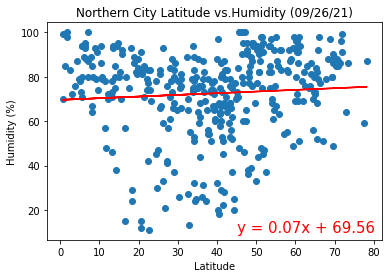

In [181]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_weather_df["Lat"], northern_city_weather_df["Humidity"])
#regress_values = northern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Humidity"])

plt.scatter(northern_city_weather_df["Lat"], northern_city_weather_df["Humidity"])
plt.plot(northern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(45,10),fontsize=15,color="red")
plt.title(f"Northern City Latitude vs.Humidity ({today.strftime('%m/%d/%y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19916413283126674


Text(0.5, 0, 'Latitude')

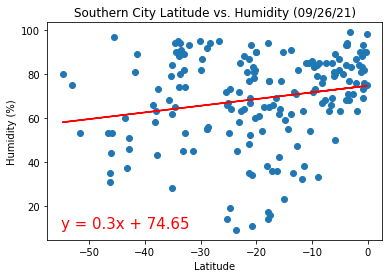

In [183]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_weather_df["Lat"], southern_city_weather_df["Humidity"])
#regress_values = southern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Humidity"])

plt.scatter(southern_city_weather_df["Lat"], southern_city_weather_df["Humidity"])
plt.plot(southern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(-55,10),fontsize=15,color="red")
plt.title(f"Southern City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09708767043503881


Text(0.5, 0, 'Latitude')

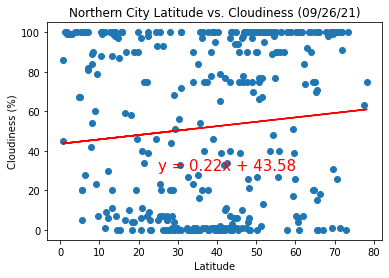

In [184]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_weather_df["Lat"], northern_city_weather_df["Cloudiness"])
#regress_values = northern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Cloudiness"])

plt.scatter(northern_city_weather_df["Lat"], northern_city_weather_df["Cloudiness"])
plt.plot(northern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(25,30),fontsize=15,color="red")
plt.title(f"Northern City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21494022458775028


Text(0.5, 0, 'Latitude')

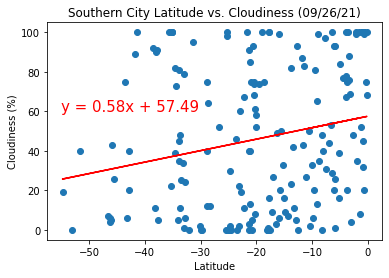

In [185]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_weather_df["Lat"], southern_city_weather_df["Cloudiness"])
#regress_values = southern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Cloudiness"])

plt.scatter(southern_city_weather_df["Lat"], southern_city_weather_df["Cloudiness"])
plt.plot(southern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(-55,60),fontsize=15,color="red")
plt.title(f"Southern City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21639753864451258


Text(0.5, 0, 'Latitude')

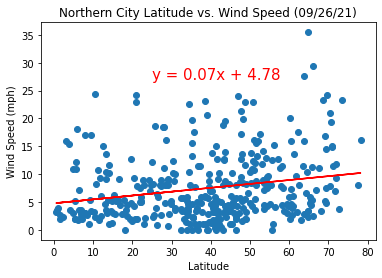

In [186]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_city_weather_df["Lat"], northern_city_weather_df["Wind Speed"])
#regress_values = northern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Wind Speed"])

plt.scatter(northern_city_weather_df["Lat"], northern_city_weather_df["Wind Speed"])
plt.plot(northern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(25,27),fontsize=15,color="red")
plt.title(f"Northern City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12023529642397761


Text(0.5, 0, 'Latitude')

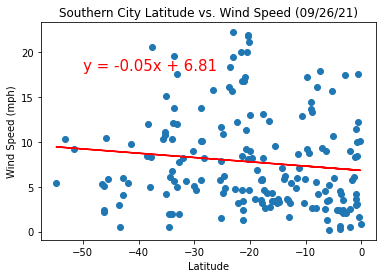

In [187]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_city_weather_df["Lat"], southern_city_weather_df["Wind Speed"])
#regress_values = southern_city_weather_df["Lat"] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"The r-value is: {rvalue}")

reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Wind Speed"])

plt.scatter(southern_city_weather_df["Lat"], southern_city_weather_df["Wind Speed"])
plt.plot(southern_city_weather_df["Lat"],reg_vals,"r-")
plt.annotate(ln_eq,(-50,18),fontsize=15,color="red")
plt.title(f"Southern City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")